In [1]:
%matplotlib ipympl

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import linregress
import matplotlib
font = {'size'   : 12}

matplotlib.rc('font', **font)
import time


In [3]:
import bluepysnap as bp
path_to_simulation = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/fullSSCx/longSim/compareModalities/f554be01-456c-4a15-8670-df39a3187b7e/0/'
s = bp.Simulation(path_to_simulation+'simulation_config.json')
population_name = s.reports['lfp_report'].population_names[0]

r  = s.reports['lfp_report'][population_name]

# types = list(s.circuit.nodes.property_values('mtype'))

# Load spikes

In [4]:
regions = ['S1FL','S1DZ','S1DZO','S1HL','S1Sh','S1Tr','S1ULp']

types = np.sort(list(s.circuit.nodes.property_values('mtype')))

index = 0

path_to_spikes = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/fullSSCx/longSim/compareModalities/f554be01-456c-4a15-8670-df39a3187b7e/0/pkls/'

for region in regions:
    for t in types:
        
        report = pd.read_pickle(path_to_spikes+'/spikes_'+region+'_'+t+'.pkl')
        
        if index == 0:
            spikeReports = report
        else:
            spikeReports = pd.concat((spikeReports,report))
        

# Load signals

In [5]:
   
EEGs = {}

f = path_to_simulation+'/pkls/eegs/'

for file in os.listdir(f):
    t = file.split('.')[0]
    EEGs[t] = pd.read_pickle(f+file)
    

In [6]:
regions = ['S1FL','S1DZ','S1DZO','S1HL','S1Sh','S1Tr','S1ULp']

byRegion = {}

for region in regions:
    
    byRegion[region] = 0
    
    for key in EEGs.keys():
        if region in key:
            byRegion[region] += EEGs[key]


In [7]:
eegTotal = 0
err = 0
for key, value in EEGs.items():
    eegTotal += value

        


# Plot signals

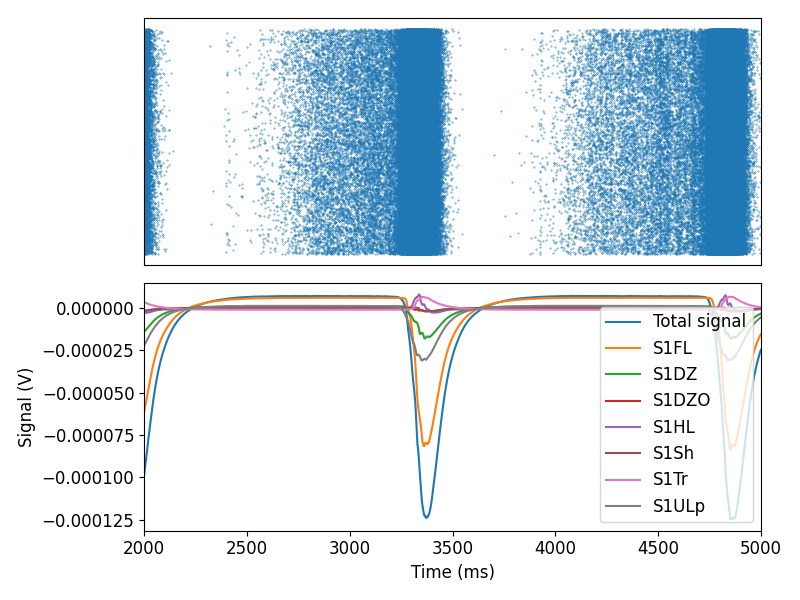

In [8]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)

plt.scatter(spikeReports.index,spikeReports.values,s=.1)
plt.gca().yaxis.set_visible(False)
plt.gca().xaxis.set_visible(False)
plt.xlim([2000,5000])

plt.subplot(2,1,2)

plt.plot(eegTotal['Forelimb_EEG_Reciprocity'])

for region in regions:
    plt.plot(byRegion[region]['Forelimb_EEG_Reciprocity'])
    
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['Total signal']+regions)

plt.xlim([2000,5000])

plt.tight_layout()

plt.savefig('figures/eegByRegion.png',dpi=300)

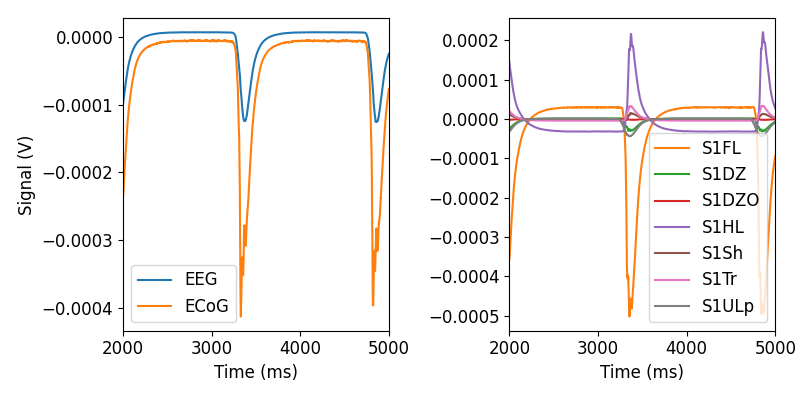

In [9]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)

plt.plot(eegTotal['Forelimb_EEG_Reciprocity'])
plt.plot(eegTotal['Forelimb_ECoG_Reciprocity'])


plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['EEG','ECoG'])
plt.tight_layout()
plt.xlim([2000,5000])

plt.subplot(1,2,2)

for i, region in enumerate(regions):
    plt.plot(byRegion[region]['Forelimb_ECoG_Reciprocity'],c='C'+str(i+1))
    
plt.xlabel('Time (ms)')
plt.tight_layout()
plt.xlim([2000,5000])
plt.legend(regions)

plt.savefig('figures/eegvsecog.png',dpi=300)

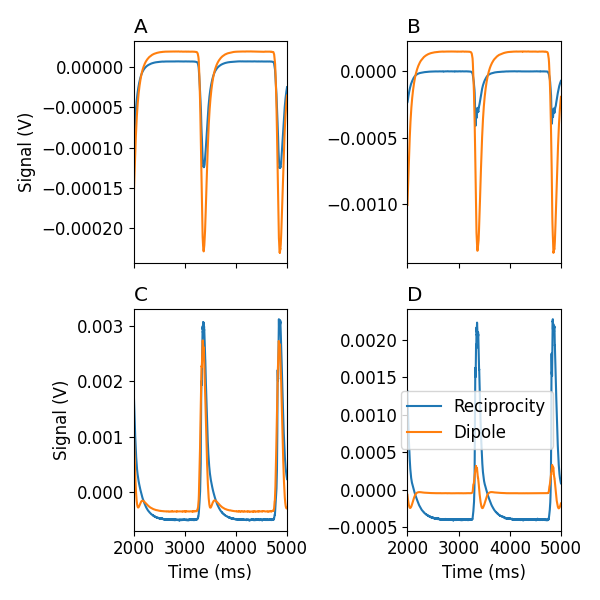

In [13]:
plt.figure(figsize=(6,6))


ax = plt.subplot(2,2,1)

plt.plot(eegTotal['Forelimb_EEG_Reciprocity'])
plt.plot(eegTotal['Forelimb_EEG_Dipole'])
plt.xticks(visible=False)
plt.xlim([2000,5000])
plt.ylabel('Signal (V)')
ax.set_title('A',ha='left', x=-0)
plt.tight_layout()


ax = plt.subplot(2,2,2)

plt.plot(eegTotal['Forelimb_ECoG_Reciprocity'])
plt.plot(eegTotal['Forelimb_ECoG_Dipole'])
plt.xticks(visible=False)
plt.xlim([2000,5000])
ax.set_title('B',ha='left', x=-0)
plt.tight_layout()

ax = plt.subplot(2,2,3)

plt.plot(eegTotal['Forelimb_LFP_Reciprocity'])
plt.plot(eegTotal['Forelimb_LFP_Dipole'])
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.xlim([2000,5000])
ax.set_title('C',ha='left', x=-0)
plt.tight_layout()

ax = plt.subplot(2,2,4)

plt.plot(byRegion['S1FL']['Forelimb_LFP_Reciprocity'])
plt.plot(byRegion['S1FL']['Forelimb_LFP_Dipole'])
plt.xlabel('Time (ms)')
plt.legend(['Reciprocity','Dipole'])
plt.xlim([2000,5000])
plt.tight_layout()
ax.set_title('D',ha='left', x=-0)

plt.savefig('figures/compareDipole.png',dpi=300)

<IPython.core.display.Javascript object>


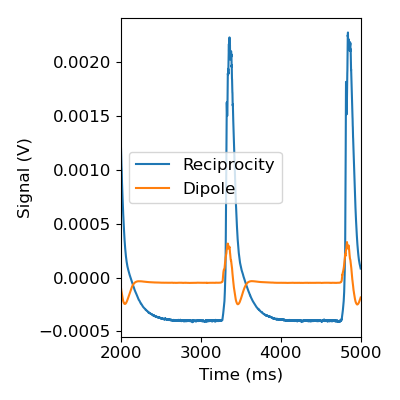

In [24]:
plt.figure(figsize=(4,4))
plt.plot(byRegion['S1FL']['Forelimb_LFP_Reciprocity'])
plt.plot(byRegion['S1FL']['Forelimb_LFP_Dipole'])
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['Reciprocity','Dipole'])
plt.xlim([2000,5000])
plt.tight_layout()
plt.savefig('figures/LFPDipole.png',dpi=300)

# Samples cells from exemplary regions and gets scaling factors

In [14]:
circuit = s.circuit

In [15]:
nodes = circuit.nodes

In [16]:
nFl = nodes.get('S1FL',properties=['mtype'])
nHl = nodes.get('S1HL',properties=['mtype'])
nULp = nodes.get('S1ULp',properties=['mtype'])

In [17]:
Fl = next(nFl)[1]
Fl = np.array(list(Fl[Fl['mtype']=='L5_TPC:A'].index))[:,1].astype(int)

Hl = next(nHl)[1]
Hl = np.array(list(Hl[Hl['mtype']=='L5_TPC:A'].index))[:,1].astype(int)

ULp = next(nULp)[1]
ULp = np.array(list(ULp[ULp['mtype']=='L5_TPC:A'].index))[:,1].astype(int)

In [18]:
import h5py

In [19]:
coeffsFile = "/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/fullSSCx/ddfc78fe-e349-41e2-b000-1ff92bf0f1b5/0/coeffsEcog_EEG.h5"

coeffs = h5py.File(coeffsFile)

In [20]:
allNodeIds = coeffs['S1nonbarrel_neurons']['node_ids']

In [21]:
flIndex = np.where(np.isin(allNodeIds[:],Fl))[0]
hlIndex = np.where(np.isin(allNodeIds[:],Hl))[0]
ulpIndex = np.where(np.isin(allNodeIds[:],ULp))[0]


In [22]:
np.random.seed(1776)

flIndex = np.sort(np.random.choice(flIndex,1000,replace=False))
hlIndex = np.sort(np.random.choice(hlIndex,1000,replace=False))
ulpIndex = np.sort(np.random.choice(ulpIndex,1000,replace=False))




In [23]:
FLshort = allNodeIds[:][flIndex]
HLshort = allNodeIds[:][hlIndex]
ULPshort = allNodeIds[:][ulpIndex]

In [24]:
flOffsets = [coeffs['S1nonbarrel_neurons']['offsets'][:][flIndex],coeffs['S1nonbarrel_neurons']['offsets'][:][flIndex+1]]
hlOffsets = [coeffs['S1nonbarrel_neurons']['offsets'][:][hlIndex],coeffs['S1nonbarrel_neurons']['offsets'][:][hlIndex+1]]
ulpOffsets = [coeffs['S1nonbarrel_neurons']['offsets'][:][ulpIndex],coeffs['S1nonbarrel_neurons']['offsets'][:][ulpIndex+1]]


In [32]:
scaleFacFl = []
scaleFacHl = []
scaleFacULp = []

for i in range(len(flOffsets[0])):
    
    sfl = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][flOffsets[0][i]:flOffsets[1][i]][:,1]
    # sfl -= sfl[0]
    
    shl = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][hlOffsets[0][i]:hlOffsets[1][i]][:,1]
    # shl -= shl[0]
    
    sulp = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][ulpOffsets[0][i]:ulpOffsets[1][i]][:,1]
    # sulp -= sulp[0]

    scaleFacFl.append( sfl )
    scaleFacHl.append( shl )
    scaleFacULp.append( sulp )

# scaleFacFl = [s for item in scaleFacFl for s in item]
# scaleFacHl = [s for item in scaleFacHl for s in item]
# scaleFacULp = [s for item in scaleFacULp for s in item]

scaleFacFlEcog = []
scaleFacHlEcog = []
scaleFacULpEcog = []

for i in range(len(flOffsets[0])):
    
    sfl = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][flOffsets[0][i]:flOffsets[1][i]][:,0]
    # sfl -= sfl[0]
    
    shl = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][hlOffsets[0][i]:hlOffsets[1][i]][:,0]
    # shl -= shl[0]
    
    sulp = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][ulpOffsets[0][i]:ulpOffsets[1][i]][:,0]
    # sulp -= sulp[0]

    scaleFacFlEcog.append( sfl )
    scaleFacHlEcog.append( shl )
    scaleFacULpEcog.append( sulp )

# scaleFacFlEcog = [s for item in scaleFacFlEcog for s in item]
# scaleFacHlEcog = [s for item in scaleFacHlEcog for s in item]
# scaleFacULpEcog = [s for item in scaleFacULpEcog for s in item]


In [26]:
# len(flIndex)

In [27]:
# plt.figure()
# _, bins,_ = plt.hist(scaleFacFl,alpha=0.5,bins=100)
# plt.hist(scaleFacHl,alpha=0.5,bins=bins)
# plt.hist(scaleFacULp,alpha=0.5,bins=bins)

In [28]:
# plt.figure()
# _,bins,_ = plt.hist(scaleFacFlEcog,alpha=0.5,bins=100)
# plt.hist(scaleFacHlEcog,alpha=0.5,bins=bins)
# plt.hist(scaleFacULpEcog,alpha=0.5,bins=bins)

In [29]:
# plt.figure()
# _,bins,_ = plt.hist(scaleFacFl,alpha=0.5,bins=100)
# plt.hist(scaleFacFlEcog,alpha=0.5,bins=bins)


# Loads 3d positions

In [33]:
path_to_positions = "/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/fullSSCx/ddfc78fe-e349-41e2-b000-1ff92bf0f1b5/0/positions_all_new/"


In [34]:
allIds = [FLshort,HLshort,ULPshort]

allIds = [s for item in allIds for s in item]

allIds = np.array(allIds)

import os

i = 0
for subfolder in os.listdir(path_to_positions):
    for file in os.listdir(path_to_positions+subfolder):
        
        if i > 10:
            break
        
        positions = pd.read_pickle(path_to_positions+subfolder+'/'+file)
        
        columns = np.array(list(positions.columns))[:,0]
        
        indices = np.where(np.isin(allIds,columns))[0]
        
        if len(indices)==0:
            continue
        
        idsInFile = allIds[indices]

        positions = positions[idsInFile]
        
        if i == 0:
            allPositions = positions
        else:
            allPositions = pd.concat((allPositions,positions),axis=1)
            
        i += 1
        

In [35]:
ids = np.unique(np.array(list(allPositions.columns))[:,0])

In [36]:
def getNeuronSegmentMidpts(position):
    '''
    Gets midpoints for a single neuron
    '''

    
    secIds = np.array(list(position.columns))
    uniqueSecIds = np.unique(secIds)

    for sId in uniqueSecIds: # Iterates through sections

        pos = position.iloc[:,np.where(sId == secIds)[0]]

        if sId == 0: # Implies that section is a soma, so we just take the position from the file

            newPos = pos
 
        elif np.shape(pos.values)[-1] == 1: # If there is only one point in the section, we just take the value
            newPos = pd.concat((newPos,pos),axis=1)

        else: # We take the midpoints of the values in the file, which are the endpoints of the segments
            pos = (pos.iloc[:,:-1]+pos.iloc[:,1:])/2

            newPos = pd.concat((newPos,pos),axis=1)

    return newPos

In [37]:
ecog = np.array([3996,-777,-1292])
eeg = np.array([3996,-777,1860.97])
returnElectrode = np.array([2677,851,2275.32])

In [54]:
min = np.Inf
max = -np.Inf

for s in scaleFacULpEcog:
    if np.min(s) < min:
        min = np.min(s)
    if np.max(s)>max:
        max=np.max(s)

print(min)
print(max)

3.2511498347559857e-07
3.591182141883404e-07


# Scaling factors for EEG electrode, reciprocity approach

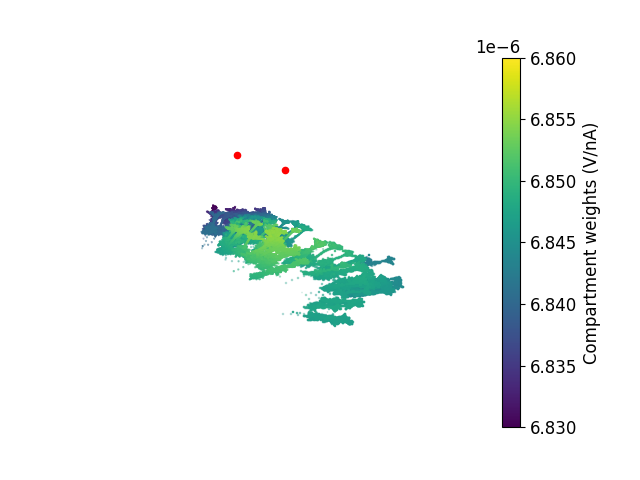

In [51]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in ids:
    
    if i in FLshort:
        region = FLshort
        marker = 'o'
        scaleFac = scaleFacFl
        color = 'C0'
    elif i in HLshort:
        region = HLshort
        marker = 'v'
        scaleFac = scaleFacHl
        color='C1'
    elif i in ULPshort:
        region = ULPshort
        marker ='s'
        scaleFac = scaleFacULp
        color='C2'
        
    index = np.where(region==i)[0][0]
    
    scale = scaleFac[index]
    
    p = getNeuronSegmentMidpts(allPositions[i]).values
        
#     p = allPositions[i].values
#     ax.scatter(p[0],p[1],p[2],marker=marker,c=color)
    im = ax.scatter(p[0],p[1],p[2],marker=marker,c=scale,vmin=6.83e-6,vmax=6.86e-6,s=.5)
    
ax.view_init(elev=9., azim=-85)

ax.scatter(eeg[0],eeg[1],eeg[2],c='r',s=20)
ax.scatter(returnElectrode[0],returnElectrode[1],returnElectrode[2],c='r',s=20)

plt.axis('off')

plt.colorbar(im,label='Compartment weights (V/nA)')

plt.savefig('figures/eeg.png',dpi=300)

# Scaling factors for ECoG electrode, reciprocity approach

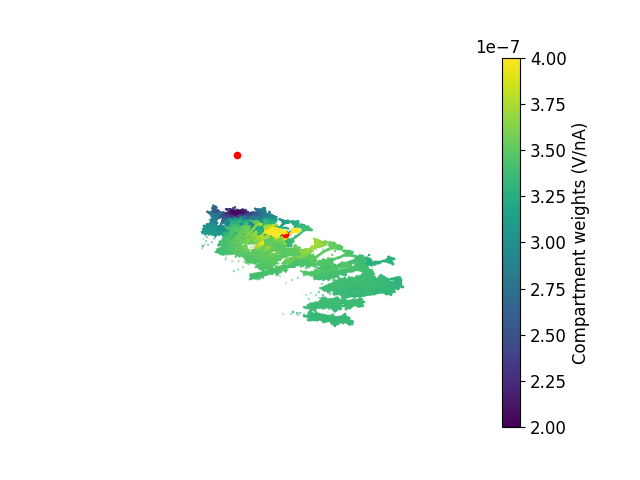

In [63]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in ids:
    
    if i in FLshort:
        region = FLshort
        marker = 'o'
        scaleFac = scaleFacFlEcog
        color = 'C0'
    elif i in HLshort:
        region = HLshort
        marker = 'v'
        scaleFac = scaleFacHlEcog
        color='C1'
    elif i in ULPshort:
        region = ULPshort
        marker ='s'
        scaleFac = scaleFacULpEcog
        color='C2'
        
    index = np.where(region==i)[0][0]
    
    scale = scaleFac[index]
    
    p = getNeuronSegmentMidpts(allPositions[i]).values
#     p = allPositions[i].values
#     ax.scatter(p[0],p[1],p[2],marker=marker,c=color)
    im = ax.scatter(p[0],p[1],p[2],marker=marker,c=scale,vmin=2e-7,vmax=4e-7,s=.5)
    
ax.view_init(elev=9., azim=-85)

ax.scatter(ecog[0],ecog[1],ecog[2],c='r',s=20)

ax.scatter(returnElectrode[0],returnElectrode[1],returnElectrode[2],c='r',s=20)

plt.colorbar(im,label='Compartment weights (V/nA)')

plt.axis('off')

plt.savefig('figures/ecog.png',dpi=300)

In [64]:
import numpy
import pandas
import h5py
import os

import neurom
import conntility
import bluepysnap as bluepy

from scipy import interpolate
from matplotlib import pyplot as plt

fn_electrodes = "/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/fullSSCx/ddfc78fe-e349-41e2-b000-1ff92bf0f1b5/0/coeffsEcog_EEG.h5"
fn_sim = '/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/fullSSCx/1b8509b6-94ac-4117-99c5-7f78ee4cf01a/0/simulation_config.json'
neuron_pop_str = "S1nonbarrel_neurons"


class ElectrodeReader(object):
    def __init__(self, fn_electrodes, fn_sim, neuron_pop_str):
        self.sim = bluepy.Simulation(fn_sim)
        self.circ = self.sim.circuit
        self.elec_h5 = h5py.File(fn_electrodes, "r")
        self.pop = neuron_pop_str
        self.e_df = self._read_electrode_metadata()
        self.nrn_df = self._read_neuron_dataframe()
        rep_fn = os.path.join(self.sim.config["output"]["output_dir"],
                              self.sim.reports["compartment"].config["file_name"] + ".h5")
        self.rep = h5py.File(rep_fn, "r")

        
    def _read_electrode_metadata(self):
        grp = self.elec_h5["electrodes"]

        populations = list(self.elec_h5.keys())
        populations.pop(populations.index("electrodes"))
        assert self.pop in populations

        electrodes = [int(_k) for _k in grp.keys() if _k not in populations]
        props = ["layer", "position", "region", "type"]

        electrode_series = []
        for electrode_id in electrodes:
            e = pandas.Series(dict([(_prop, grp[str(electrode_id)][_prop][()])
                                     for _prop in props]))
            electrode_series.append(e)

        e_df = pandas.concat(electrode_series, axis=1, keys=electrodes).transpose()
        return e_df
    
    def _read_neuron_dataframe(self):
        props = ["mtype", "morphology", "layer", "region", "x", "y", "z", "flat_x", "flat_y"]
        nrn = conntility.circuit_models.neuron_groups.load_neurons(self.circ, props,
                                                           base_target=self.sim.config["node_set"],
                                                           node_population=self.pop)
        return nrn
    
    def morph_dir(self, morph_format="h5v1"):
        nodes = self.circ.config["networks"]["nodes"][0]
        return nodes["populations"][self.pop]["alternate_morphologies"][morph_format]
    
    def mapping_sec_ids(self, node_id):
        rep_grp = self.rep["report"][self.pop]["mapping"]
        j = numpy.nonzero(rep_grp["node_ids"][:] == node_id)[0][0]
        idx = rep_grp["index_pointers"][j:j+2]

        e_ids = rep_grp["element_ids"][idx[0]:idx[1]]
        return e_ids
    
    def electrode_weights(self, node_id):
        node_ids = self.elec_h5[self.pop]["node_ids"][:]
        assert node_id in node_ids
        i = numpy.nonzero(node_ids == node_id)[0][0]
        idx = self.elec_h5[self.pop]["offsets"][i:(i+2)]
        
        factors = self.elec_h5["electrodes"][self.pop]["scaling_factors"][idx[0]:idx[1]]
        e_ids = self.mapping_sec_ids(node_id)
        factor_df = pandas.DataFrame(factors, index=pandas.Index(e_ids.astype(int) - 1, name="sec_id"))
        return factor_df
    
    def morphology(self, node_id):
        morph_fn = os.path.join(
            self.morph_dir(),
            self.nrn_df.set_index("node_ids")["morphology"][node_id] + ".h5"
        )
        return neurom.load_morphology(morph_fn)
    
    def neuron(self, node_id, electrode_id):
        return ElectrodeHelper(self.electrode_weights(node_id)[electrode_id],
                               self.morphology(node_id))

    
class ElectrodeHelper(object):
    def __init__(self, weights, morphology):
        self.weights = weights
        self.morph = morphology
        
    @property
    def sec_types(self):
        data = [[_sec.id, int(_sec.type)] for _sec in self.morph.sections]
        sec_type = pandas.DataFrame(data, columns=["sec_id", "sec_type"]).set_index("sec_id")["sec_type"]
        sec_type[-1] = 1 # soma
        sec_type[numpy.max(sec_type.index) + 1] = 5 # invalid
        return sec_type
    
    def mean(self):
        return self.weights.mean()
    
    def means_for_types(self):
        sec_type = self.sec_types
        tmp_df = pandas.Series(self.weights.values, name="weights",
                              index=pandas.Index(sec_type[self.weights.index].values, name="sec_type"))
        return tmp_df.groupby("sec_type").mean()
    
    def hist_for_types(self, nbins=31):
        bins = numpy.linspace(self.weights.min(), self.weights.max() + 1E-12, nbins+1)
        sec_type = self.sec_types
        tmp_df = pandas.Series(self.weights.values, name="weights",
                              index=pandas.Index(sec_type[self.weights.index].values, name="sec_type"))
        def hist_series(w):
            bin_centers = 0.5 * (bins[:-1] + bins[1:])
            return pandas.Series(
                numpy.histogram(w, bins=bins)[0], name="count",
                index=pandas.Index(bin_centers, name="weight")
            )
        return tmp_df.groupby("sec_type").apply(hist_series).unstack("weight")
    
    def plot(self, ax=None):
        if ax is None:
            fig = plt.figure(figsize=(3, 7))
            ax = fig.gca()
        
        f_norm = (self.weights - self.weights.min()) / (self.weights.max() - self.weights.min())
        morph = self.morph

        # Soma
        _c = f_norm[-1]
        #plt.plot(0, 0, marker='o', color=[1.0 - _c, _c, 0])

        for sec in morph.sections:
            if sec.id not in f_norm:
                continue
            l = numpy.linalg.norm(numpy.diff(sec.points, axis=0)[:, :3], axis=1)
            L = numpy.sum(l)
            midpoints = 0.5 * (numpy.hstack([0, numpy.cumsum(l[:-1])]) + numpy.cumsum(l))

            this_diff = f_norm[sec.id]
            if isinstance(this_diff, float):
                this_diff = numpy.array([this_diff])
            else:
                this_diff = this_diff.values

            x = numpy.linspace(0, L, len(this_diff) + 2)[1:-1]
            c = numpy.interp(midpoints, x, this_diff, left=this_diff[0],right=this_diff[-1])

            for p_fr, p_to, _c in zip(sec.points[:-1], sec.points[1:], c):
                ax.plot([p_fr[0], p_to[0]], [p_fr[1], p_to[1]],
                        color=[1.0 - _c, _c, 0])

        ax.set_aspect("equal")
        ax.set_frame_on(False)
    
    
tst = ElectrodeReader(fn_electrodes, fn_sim, neuron_pop_str)

## Exemplary neurons in each region

In each region of the model, we find a neuron of the target m-type (L5_TPC:A) that is among the most central.
We use it as a representative example of how a neuron in that region would be affecting the signal

In [65]:
region_centers = tst.nrn_df.groupby("region")[["flat_x", "flat_y"]].mean().astype(int).reset_index()
display(region_centers)
morph_lookup = tst.nrn_df.set_index(["mtype", "region", "flat_x", "flat_y"])["node_ids"]

tgt_mtype = "L5_TPC:A"


picked_node_ids = {}
for _, row in region_centers.iterrows():
    morph_filtered = morph_lookup[tgt_mtype][row["region"]]
    D = morph_filtered.index.to_frame() - row[["flat_x", "flat_y"]]
    D = (D ** 2).sum(axis=1)
    cands = morph_filtered.loc[D.loc[D == D.min()].index]
    picked_node_ids[row["region"]] = numpy.random.choice(cands.values)
    
display(picked_node_ids)

/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/tharayil/2079961/ipykernel_286481/1577147346.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_centers = tst.nrn_df.groupby("region")[["flat_x", "flat_y"]].mean().astype(int).reset_index()


,region,flat_x,flat_y
0,S1DZ,63,100
1,S1DZO,64,33
2,S1FL,33,90
3,S1HL,20,148
4,S1J,32,18
5,S1Sh,59,157
6,S1Tr,53,172
7,S1ULp,110,55


{'S1DZ': 4176600,
 'S1DZO': 3999761,
 'S1FL': 3970497,
 'S1HL': 3906473,
 'S1J': 4020679,
 'S1Sh': 3917512,
 'S1Tr': 4194667,
 'S1ULp': 3965306}

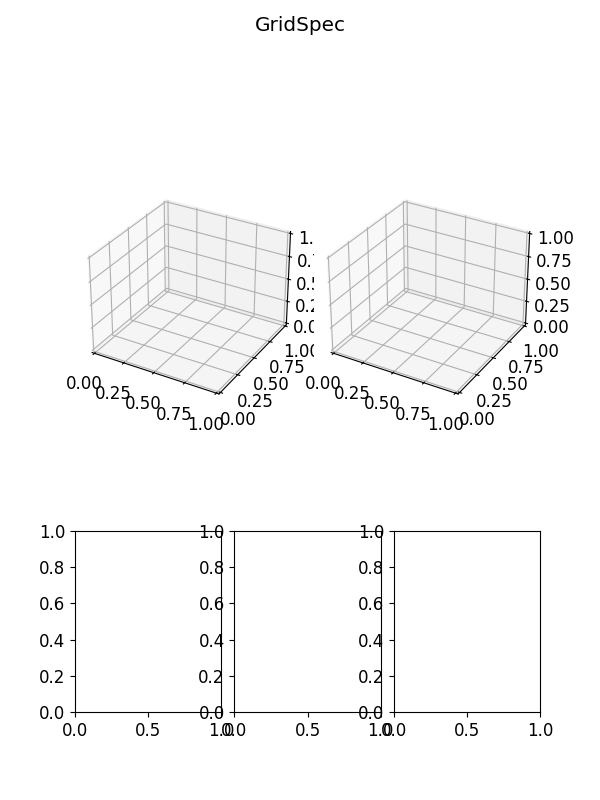

In [141]:
### from matplotlib.gridspec import GridSpec

# def format_axes(fig):
#     for i, ax in enumerate(fig.axes):
#         ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
#         ax.tick_params(labelbottom=False, labelleft=False)

import types



fig = plt.figure(figsize=(6,8))#,constrained_layout=True)

gs = GridSpec(3, 6, figure=fig)
ax1 = fig.add_subplot(gs[:-1, 0:3],projection='3d')
ax2 = fig.add_subplot(gs[:-1, 3:],projection='3d')
ax3 = fig.add_subplot(gs[-1, 0:2])
ax4 = fig.add_subplot(gs[-1, 2:4])
ax5 = fig.add_subplot(gs[-1, 4:])

fig.suptitle("GridSpec")
# format_axes(fig)

plt.show()


for i in ids:
    
    if i in FLshort:
        region = FLshort
        marker = 'o'
        scaleFac = scaleFacFl
        color = 'C0'
    elif i in HLshort:
        region = HLshort
        marker = 'v'
        scaleFac = scaleFacHl
        color='C1'
    elif i in ULPshort:
        region = ULPshort
        marker ='s'
        scaleFac = scaleFacULp
        color='C2'
        
    index = np.where(region==i)[0][0]
    
    scale = scaleFac[index]
    
    p = getNeuronSegmentMidpts(allPositions[i]).values
        
#     p = allPositions[i].values
#     ax.scatter(p[0],p[1],p[2],marker=marker,c=color)
    im = ax1.scatter(p[0],p[1],p[2],marker=marker,c=scale,vmin=6.83e-6,vmax=6.86e-6,s=.5)
    
ax1.view_init(elev=9., azim=-85)

ax1.scatter(eeg[0],eeg[1],eeg[2],c='r',s=20)
ax1.scatter(returnElectrode[0],returnElectrode[1],returnElectrode[2],c='r',s=20)

ax1.set_xlim((2801.1161576783625, 6260.576980695542))
ax1.set_ylim((-2284.337284947517, 1883.8635116069354))
ax1.set_zlim((-4332.110601382281, 914.4962633882312))

ax1.set_title('A',ha='left', x=-0)

ax1.axis('off')

cb = plt.colorbar(im,fraction=0.25,location='bottom')

cb.set_label(label='Compartment weights (V/nA)',labelpad=20)

plt.tight_layout()

for i in ids:
    
    if i in FLshort:
        region = FLshort
        marker = 'o'
        scaleFac = scaleFacFlEcog
        color = 'C0'
    elif i in HLshort:
        region = HLshort
        marker = 'v'
        scaleFac = scaleFacHlEcog
        color='C1'
    elif i in ULPshort:
        region = ULPshort
        marker ='s'
        scaleFac = scaleFacULpEcog
        color='C2'
        
    index = np.where(region==i)[0][0]
    
    scale = scaleFac[index]
    
    p = getNeuronSegmentMidpts(allPositions[i]).values
#     p = allPositions[i].values
#     ax.scatter(p[0],p[1],p[2],marker=marker,c=color)
    im = ax2.scatter(p[0],p[1],p[2],marker=marker,c=scale,vmin=2e-7,vmax=4e-7,s=.5)
    
ax2.view_init(elev=9., azim=-85)

ax2.scatter(ecog[0],ecog[1],ecog[2],c='r',s=20)

ax2.scatter(returnElectrode[0],returnElectrode[1],returnElectrode[2],c='r',s=20)

ax2.set_title('B',ha='left', x=-0)

ax2.set_xlim((2801.1161576783625, 6260.576980695542))
ax2.set_ylim((-2284.337284947517, 1883.8635116069354))
ax2.set_zlim((-4332.110601382281, 914.4962633882312))

cb = plt.colorbar(im,fraction=0.25,location='bottom')

cb.set_label(label='Compartment weights (V/nA)',labelpad=20)

ax2.set_axis_off()

plt.tight_layout()

electrode_id = 0 # ECoG Electrode

pad = plt.rcParams["xtick.major.size"] + plt.rcParams["xtick.major.pad"]

def bottom_offset(self, bboxes, bboxes2):
    bottom = self.axes.bbox.ymin
    self.offsetText.set(va="top", ha="left") 
    oy = bottom - pad * self.figure.dpi / 72.0
    self.offsetText.set_position((1.05, oy))

for region, node_id in picked_node_ids.items():

    if region == 'S1FL':

        H = tst.neuron(node_id, electrode_id).hist_for_types().transpose()
        ax3.plot(H[1], label="Soma") # sec_id = 1 is Soma (we set that manually)
        ax3.plot(H[3], label="Basal") # sec_id 3 is basal (that is canon)
        ax3.plot(H[4], label="Apical") # sec_id 4 is apical (that is canon)

        ax3.set_title('C',ha='left', x=-0)

        ax3.set_ylabel('Number of compartments')
        ax3.set_xlabel('Compartment\n weights (V/nA)',labelpad=20)

        ax3.set_ylim([0,130])

        ax3.legend()

        # ax3.xaxis._update_offset_text_position = types.MethodType(bottom_offset, ax3.xaxis)

        plt.tight_layout()

    if region == 'S1HL':

        H = tst.neuron(node_id, electrode_id).hist_for_types().transpose()
        ax4.plot(H[1], label="Soma") # sec_id = 1 is Soma (we set that manually)
        ax4.plot(H[3], label="Basal") # sec_id 3 is basal (that is canon)
        ax4.plot(H[4], label="Apical") # sec_id 4 is apical (that is canon)

        ax4.set_xlabel('Compartment\n weights (V/nA)',labelpad=20)

        ax4.set_title('D',ha='left', x=-0)
        ax4.set_yticks([])
        plt.tight_layout()
        # ax4.xaxis._update_offset_text_position = types.MethodType(bottom_offset, ax4.xaxis)

        

    if region == 'S1ULp':

        H = tst.neuron(node_id, electrode_id).hist_for_types().transpose()
        ax5.plot(H[1], label="Soma") # sec_id = 1 is Soma (we set that manually)
        ax5.plot(H[3], label="Basal") # sec_id 3 is basal (that is canon)
        ax5.plot(H[4], label="Apical") # sec_id 4 is apical (that is canon)

        ax5.set_xlabel('Compartment\n weights (V/nA)',labelpad=20)

        ax5.set_title('E',ha='left', x=-0)
        ax5.set_yticks([])

        # ax5.xaxis._update_offset_text_position = types.MethodType(bottom_offset, ax5.xaxis)

        
        plt.tight_layout()

plt.savefig('figures/mechanism.png',dpi=600)


In [134]:
ax2.get_xlim()

(2801.1161576783625, 6260.576980695542)

In [135]:
ax2.get_ylim()

(-2284.337284947517, 1883.8635116069354)

In [136]:
ax2.get_zlim()

(-4332.110601382281, 914.4962633882312)